In [2]:
import numpy as np

import nibabel as nib

import os
import re
import shutil
import SimpleITK as sitk


import matplotlib.pyplot as plt


# Copy Heart Dataset

In [13]:
def natural_keys(text):
        return [ int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text) ]

In [14]:
def read_orgin_image(PATH):
    R_IMG=os.listdir(PATH)
    R_IMG.sort(key=natural_keys)
    return R_IMG

In [ ]:
PAST_IMG_PATH   = "/BAYESIAN_UNET/VanillaUNet/data/heart/imagesTs"  
ORG_IMG_PATH    = "/ARCHIVE/DATASET_BACKUP/HEART/imagesTs"

ORG_IMG         = read_orgin_image(f"{ORG_IMG_PATH}")

 
for index,test_image_name in enumerate(ORG_IMG): 
    
    shutil.copy(f"{ORG_IMG_PATH}/{test_image_name}", f"{PAST_IMG_PATH}/{index+1}_0000.nii.gz")
        

In [ ]:
PAST_IMG_PATH   = "/BAYESIAN_UNET/VanillaUNet/data/heart/labelsTs"  
ORG_IMG_PATH    = "/ARCHIVE/DATASET_BACKUP/HEART/labelsTs_1"

ORG_IMG         = read_orgin_image(f"{ORG_IMG_PATH}")

 
for index,test_image_name in enumerate(ORG_IMG): 
    
    shutil.copy(f"{ORG_IMG_PATH}/{test_image_name}", f"{PAST_IMG_PATH}/{index+1}.nii.gz")
        

# Heart Dataset Predictions

In [15]:
def dc_dice(IMG_1,IMG_2):
    return 2*np.sum(np.sqrt(IMG_1*IMG_2))/(np.sum(IMG_2) + np.sum(IMG_1))
    
def calculate_matrix(TRUE_IMG_OUT,PRED_IMG_OUT):
    ROW=[]
    for INDEX, (TRUE_IMG,PRED_IMG) in enumerate(zip(TRUE_IMG_OUT,PRED_IMG_OUT)):
        print(dc_dice(TRUE_IMG,PRED_IMG))
    #     ROW.append([
    #         str(INDEX)+".nii.gz",
    #         dc_dice(TRUE_IMG,PRED_IMG),
    #         normalized_mutual_information(TRUE_IMG,PRED_IMG),
    #         normalized_root_mse(TRUE_IMG,PRED_IMG),
    #         mean_squared_error(TRUE_IMG,PRED_IMG)
    #     ])
        
    # return pd.DataFrame(data=ROW,columns=["ID","Dice coefficient","normalized_mutual_information","normalized_root_mse","mean_squared_error"])

In [ ]:
TRUE_IMG_PATH   = "/BAYESIAN_UNET/VanillaUNet/data/heart/"  

PRED_LABEL      = read_orgin_image(f"{TRUE_IMG_PATH}/labelsTs/")


# PRED_LABEL=glob.glob(f"{TRUE_IMG_PATH}/imagesTs/*_0001.nii.gz")
# PRED_LABEL.sort(key=natural_keys)

P_IMG=[]
T_IMG=[]

for INDEX, IMAGE_NAME in enumerate(PRED_LABEL):
    
    P_IMG.append(nib.load(f'{TRUE_IMG_PATH}/labelsTs/{IMAGE_NAME}').get_fdata()) 
    
    T_IMG.append(nib.load(f'{TRUE_IMG_PATH}/predTs/{IMAGE_NAME}').get_fdata())


calculate_matrix(T_IMG,P_IMG)


# FINAL_OUTPUT.head(20)

# Show Heart Output

In [43]:
def show_fig(SHOW_LIST,SHOW_TITLE,SIZE=(1,3),CMAP='jet'):
        plt.figure(dpi=200)
        for index, (item, title) in enumerate(zip(SHOW_LIST,SHOW_TITLE)):
            
            plt.subplot(SIZE[0], SIZE[1], index+1)
            plt.imshow(item, cmap=CMAP)
            plt.title(title)
        plt.tight_layout()
        plt.show()  

In [ ]:
PAST_IMG_PATH   = "/BAYESIAN_UNET/VanillaUNet/data/heart"  
# ORG_IMG_PATH    = "/ARCHIVE/DATASET_BACKUP/HEART/imagesTs"

In [47]:
def check_orientation(MAIN_PATH,SUB_PATH=["imagesTs","labelsTs_1","labelsTs_2"]):
    for file in os.listdir(f"{MAIN_PATH}/{SUB_PATH[1]}"):


        # print(f"{MAIN_PATH}/{SUB_PATH[0]}/{file}",f"{MAIN_PATH}/{SUB_PATH[1]}/{file}")

        
        image=nib.load(f"{MAIN_PATH}/{SUB_PATH[0]}/{file.split('.')[0]}_0000.nii.gz").get_fdata()[:,:,0]

        ref_image=nib.load(f"{MAIN_PATH}/{SUB_PATH[1]}/{file}").get_fdata()[:,:,0]
    
        org_image=nib.load(f"{MAIN_PATH}/{SUB_PATH[2]}/{file}").get_fdata()

        # print(ref_image.shape,org_image.shape)
        
        print("DC DICE for " + file+" file is => "+str(dc_dice(ref_image,org_image)))

                
        show_fig([image,ref_image,org_image],[SUB_PATH[0],SUB_PATH[1],SUB_PATH[2]],SIZE=(1,3))


DC DICE for 35.nii.gz file is => 0.8167980958324258


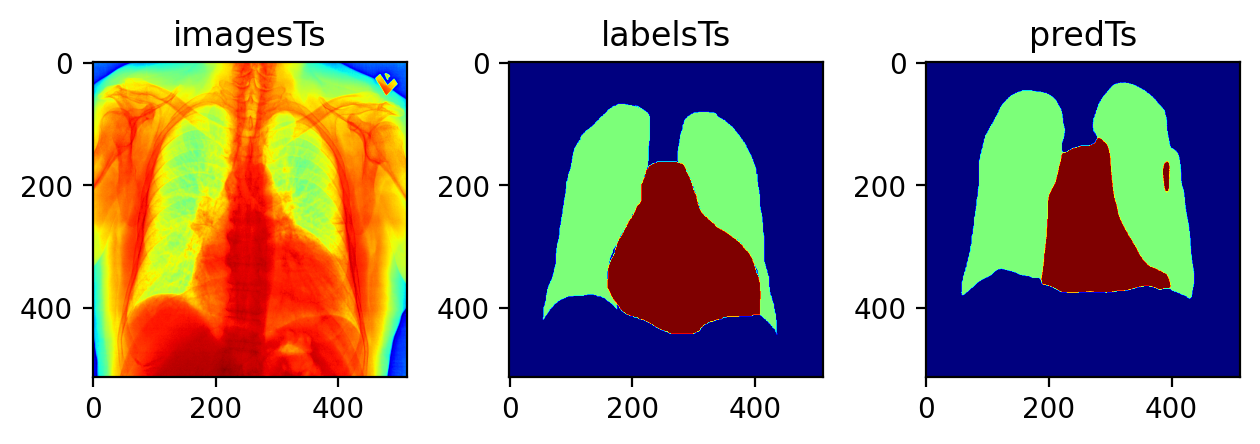

DC DICE for 39.nii.gz file is => 0.9142322914047241


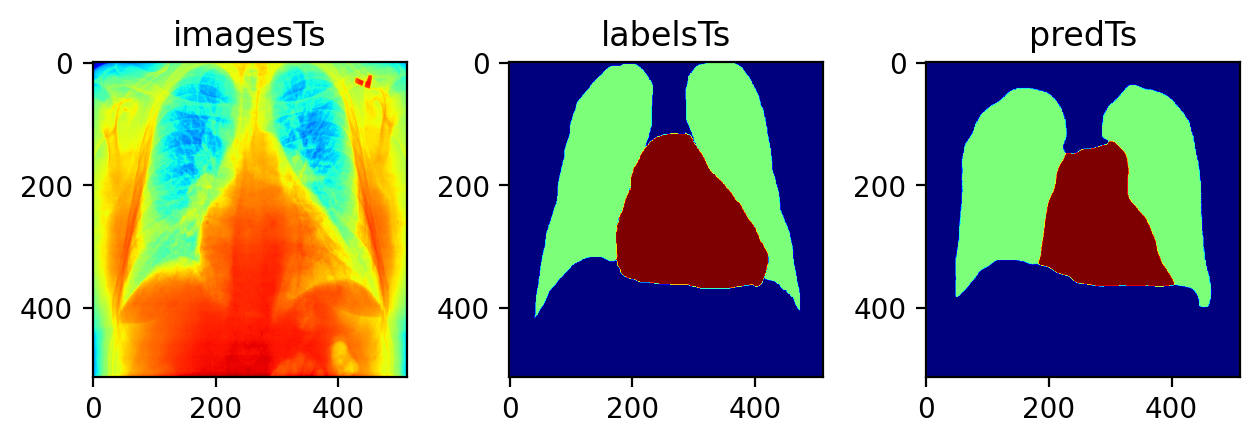

DC DICE for 33.nii.gz file is => 0.7867153117584667


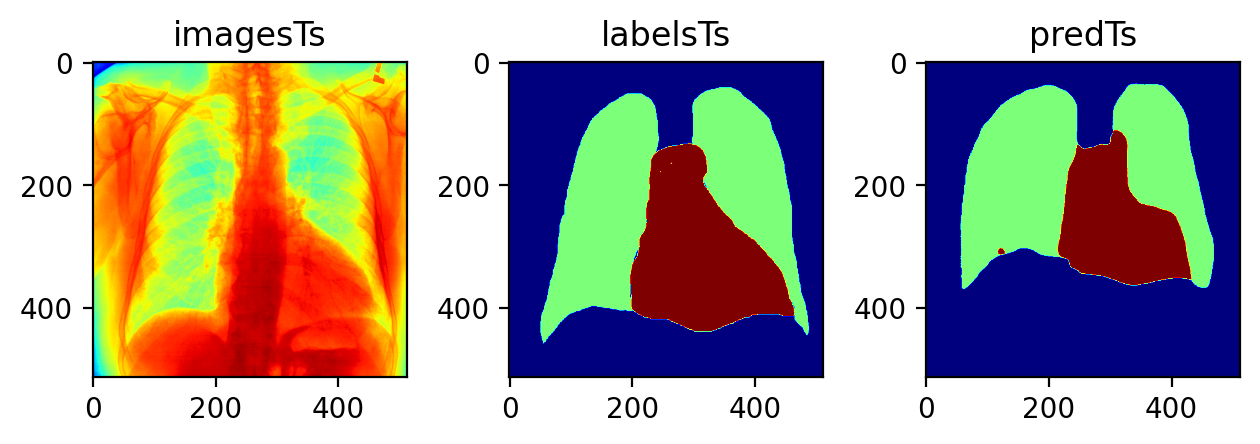

DC DICE for 7.nii.gz file is => 0.934507630832854


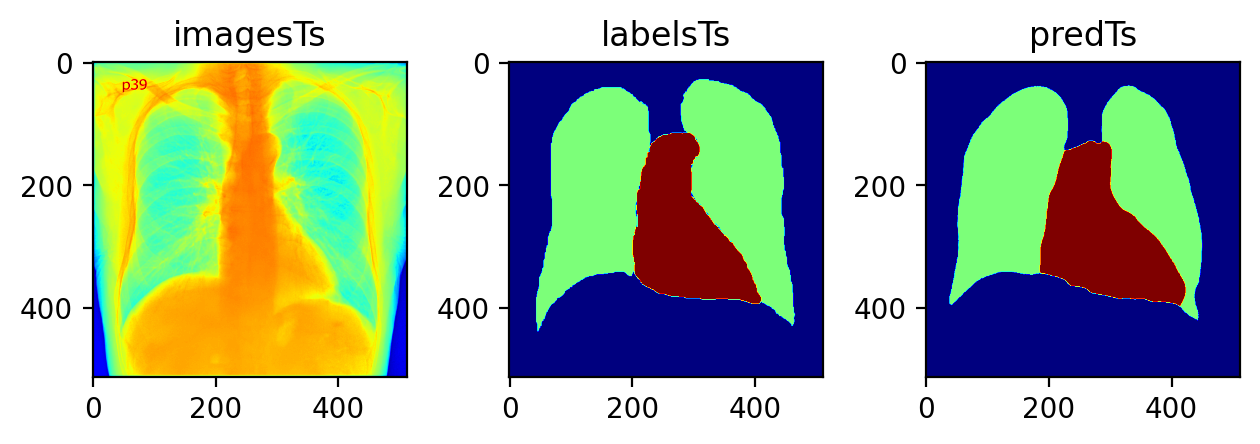

DC DICE for 17.nii.gz file is => 0.8649553295259513


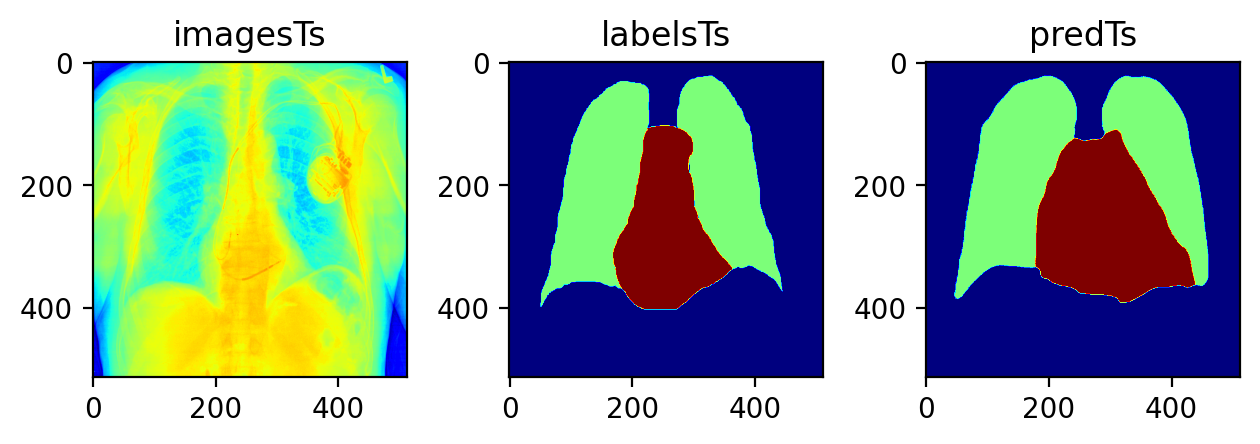

DC DICE for 44.nii.gz file is => 0.8754373992621319


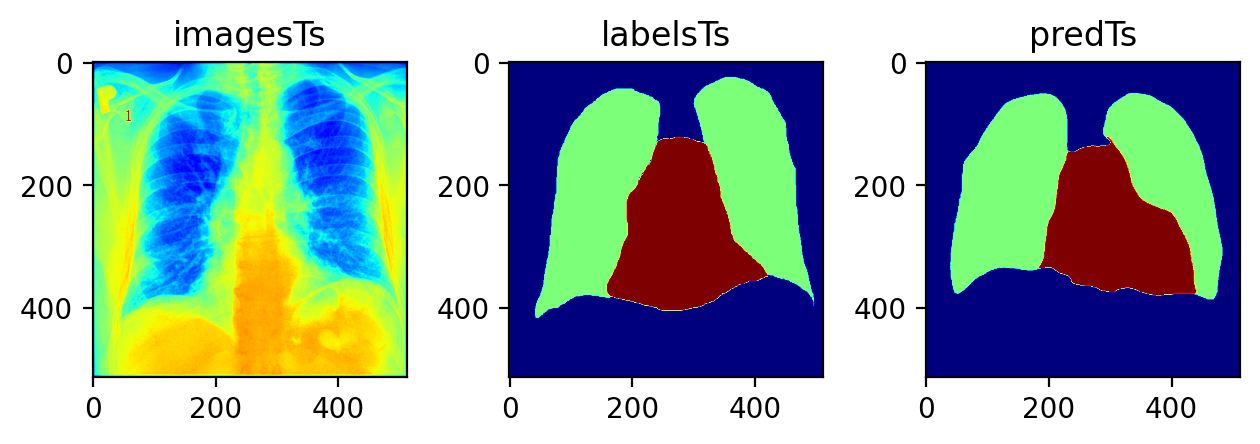

DC DICE for 24.nii.gz file is => 0.7656983645140681


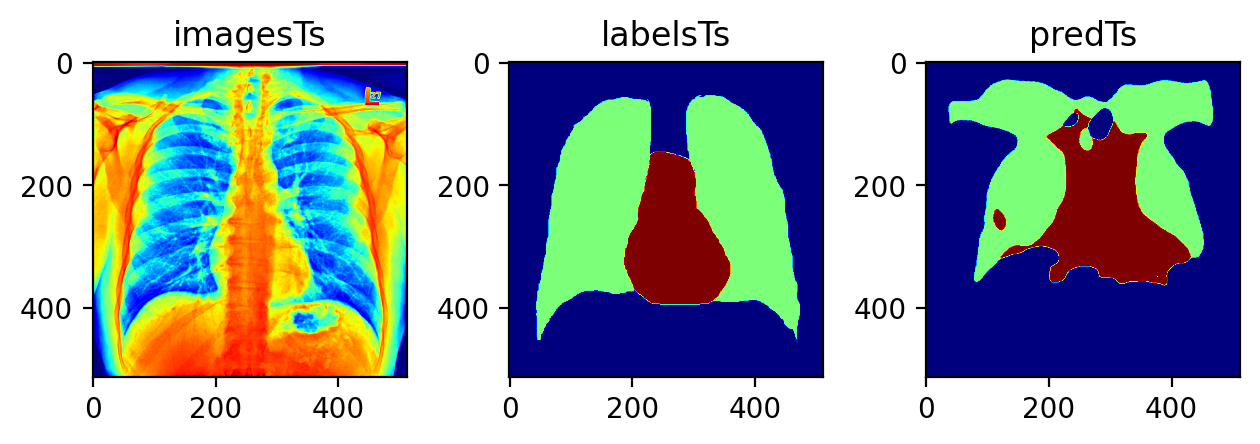

DC DICE for 46.nii.gz file is => 0.8249616603433065


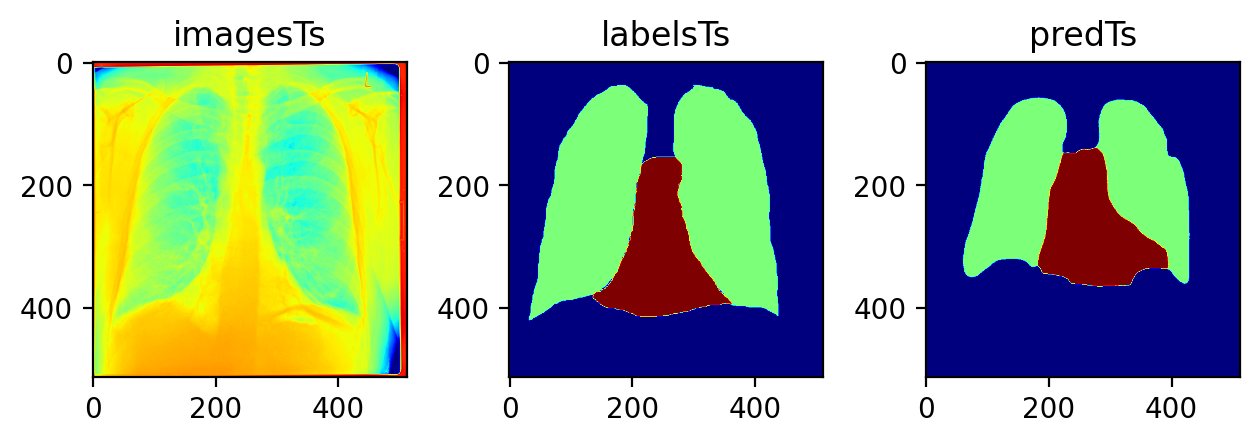

DC DICE for 8.nii.gz file is => 0.7434348426309848


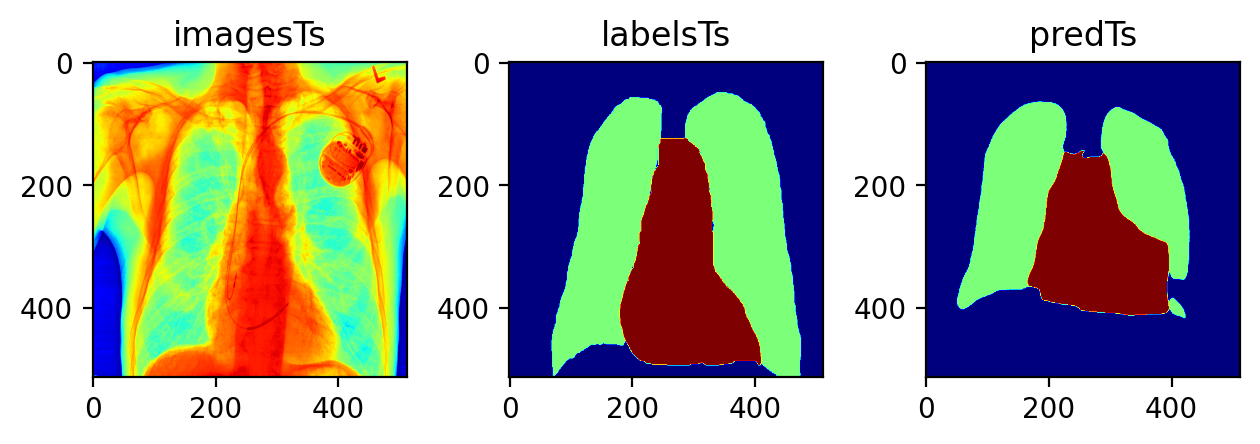

DC DICE for 25.nii.gz file is => 0.8253181614652125


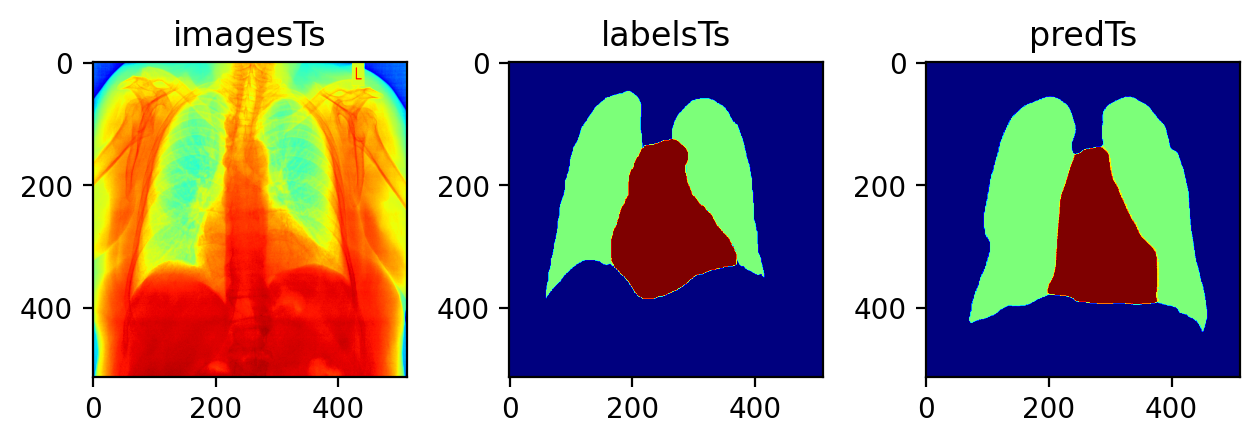

DC DICE for 34.nii.gz file is => 0.8444438803999526


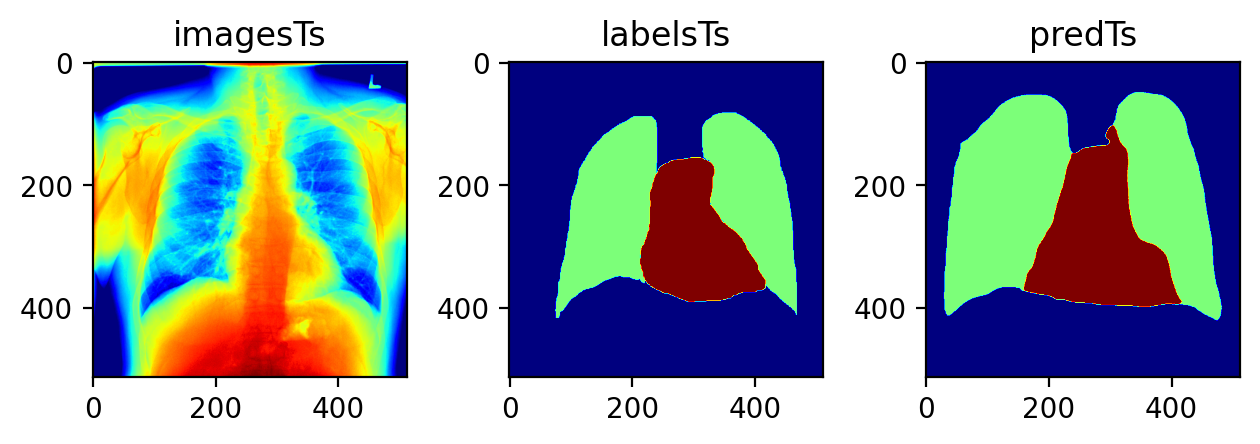

DC DICE for 19.nii.gz file is => 0.8710792919654197


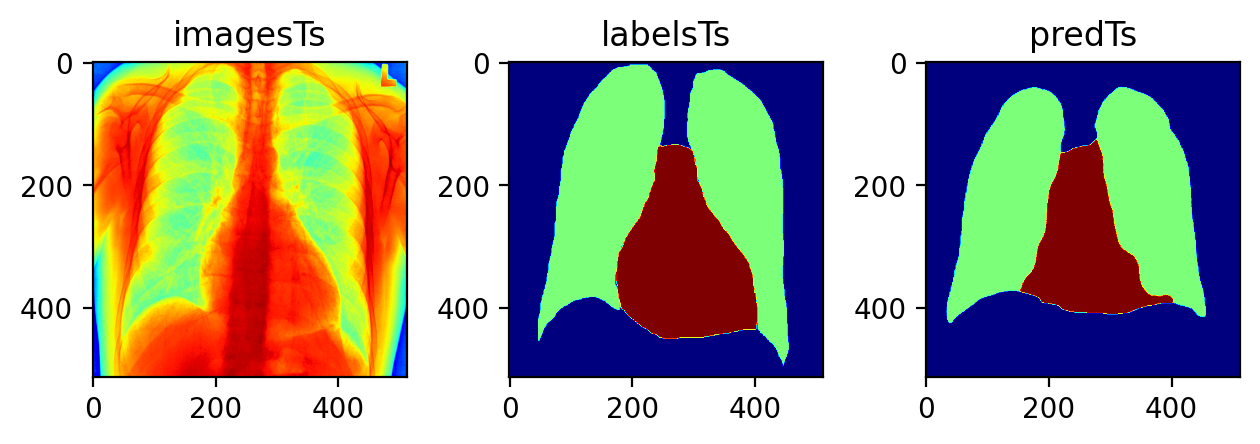

DC DICE for 38.nii.gz file is => 0.872489676388869


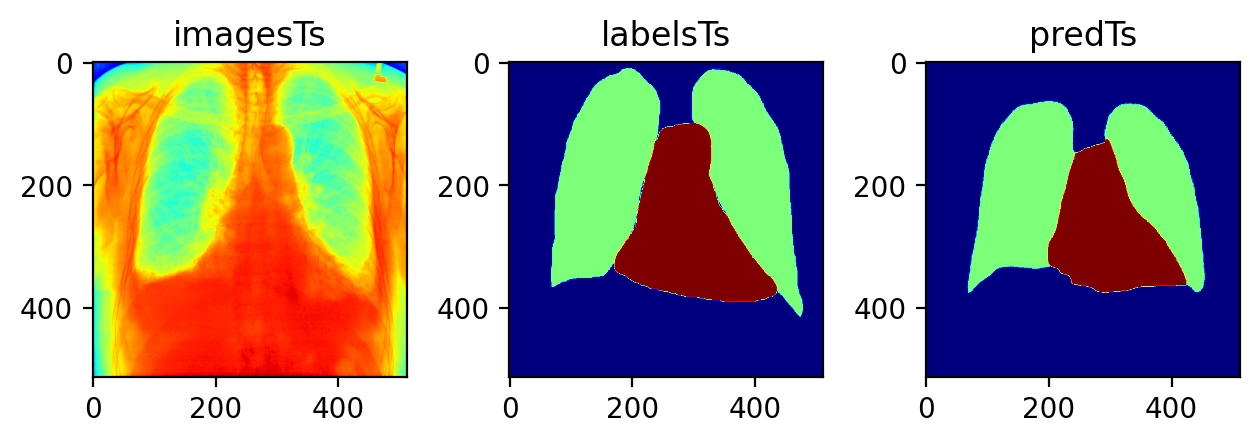

DC DICE for 6.nii.gz file is => 0.8961289576324567


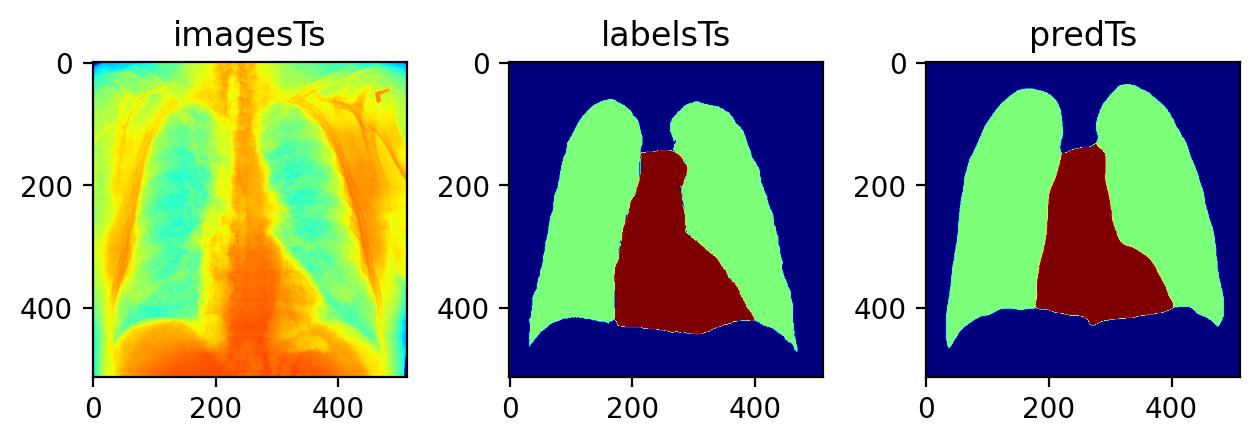

DC DICE for 27.nii.gz file is => 0.8607073962814472


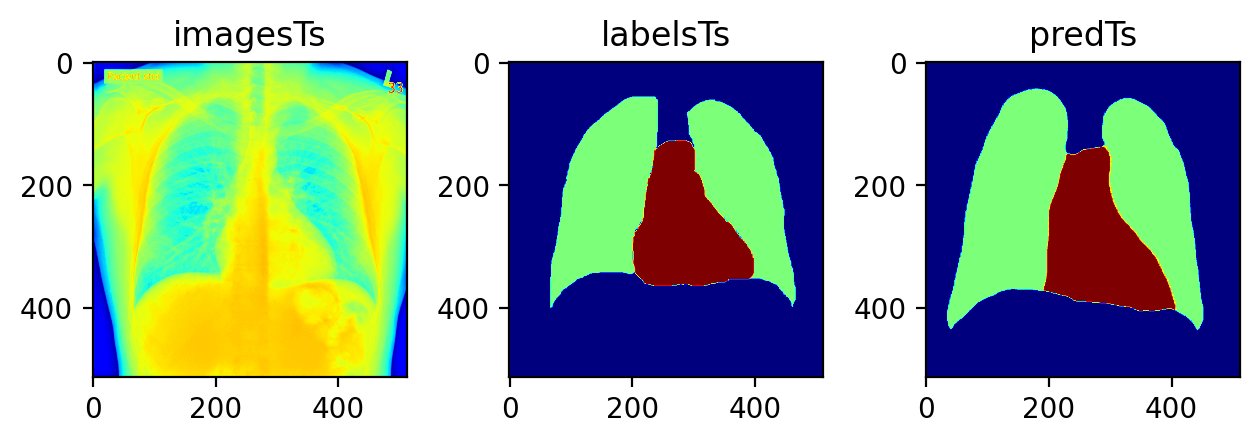

DC DICE for 10.nii.gz file is => 0.7506550920800614


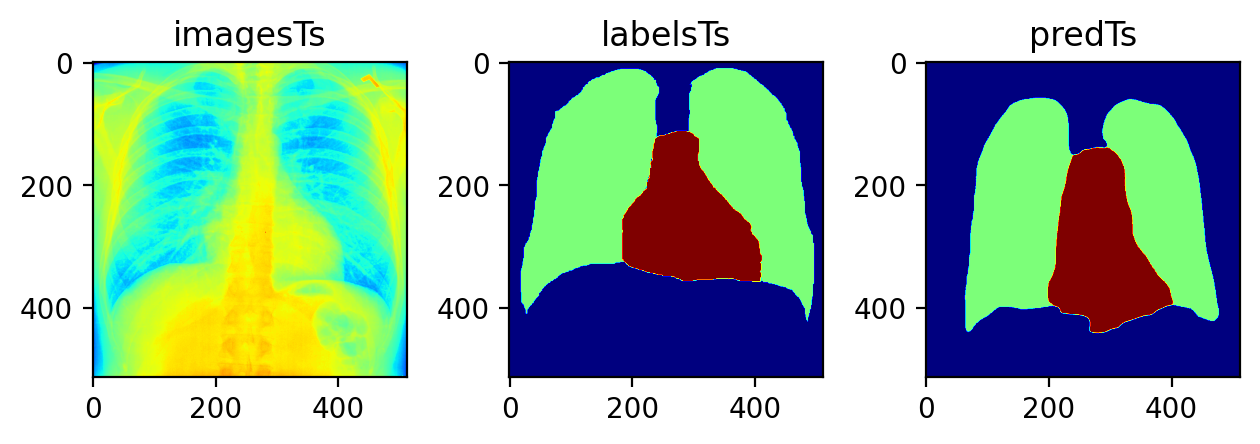

DC DICE for 40.nii.gz file is => 0.9275496884306547


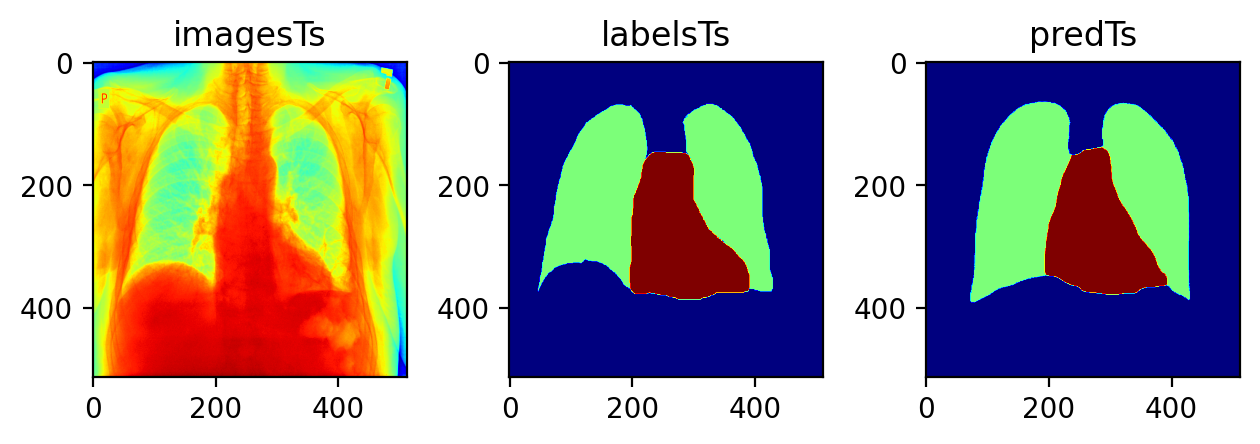

DC DICE for 9.nii.gz file is => 0.8441215523409191


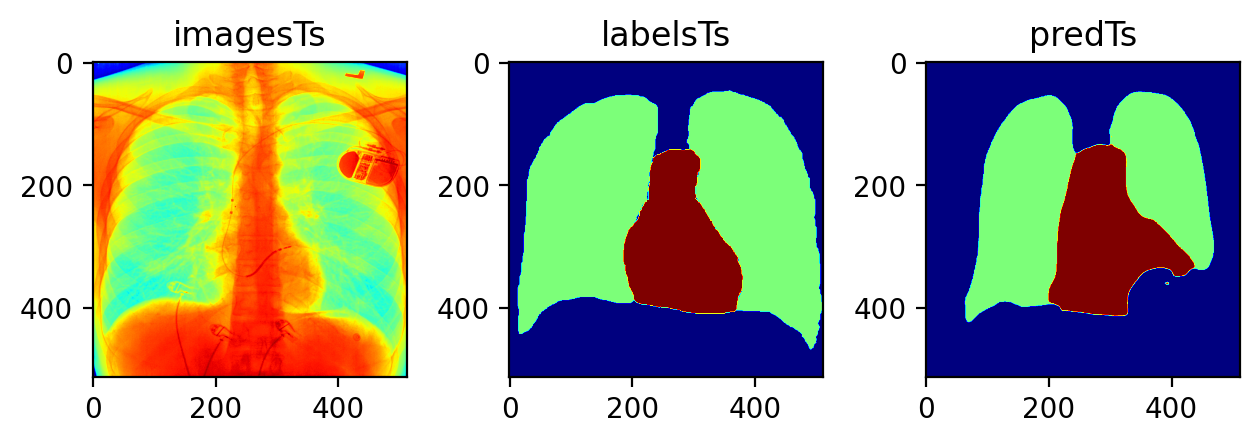

DC DICE for 28.nii.gz file is => 0.8185965919071613


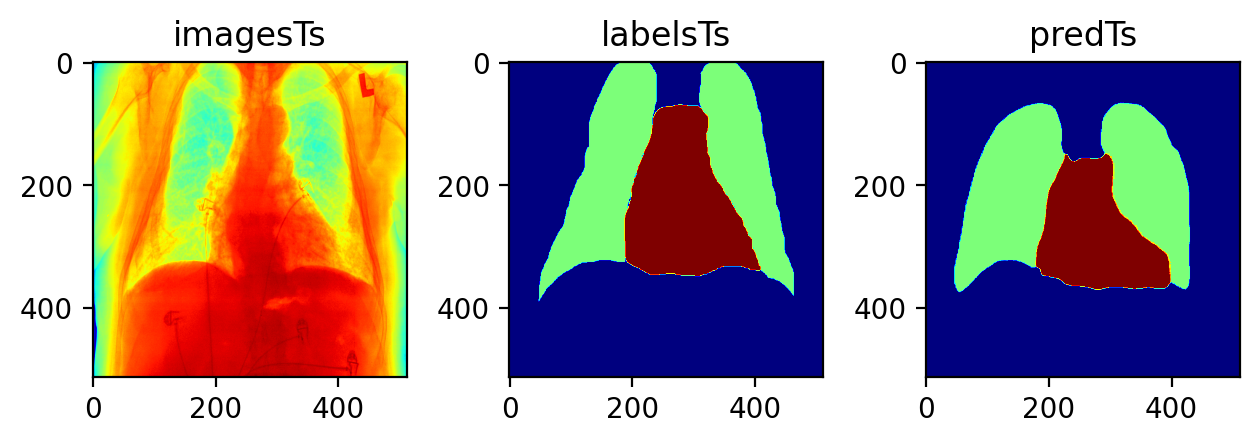

DC DICE for 16.nii.gz file is => 0.9075573985257321


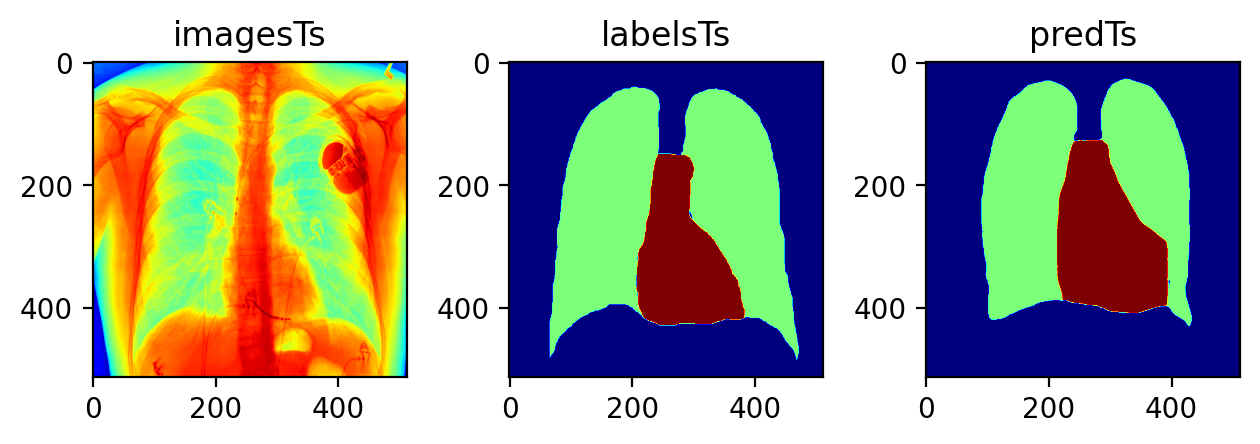

DC DICE for 30.nii.gz file is => 0.8622088811152843


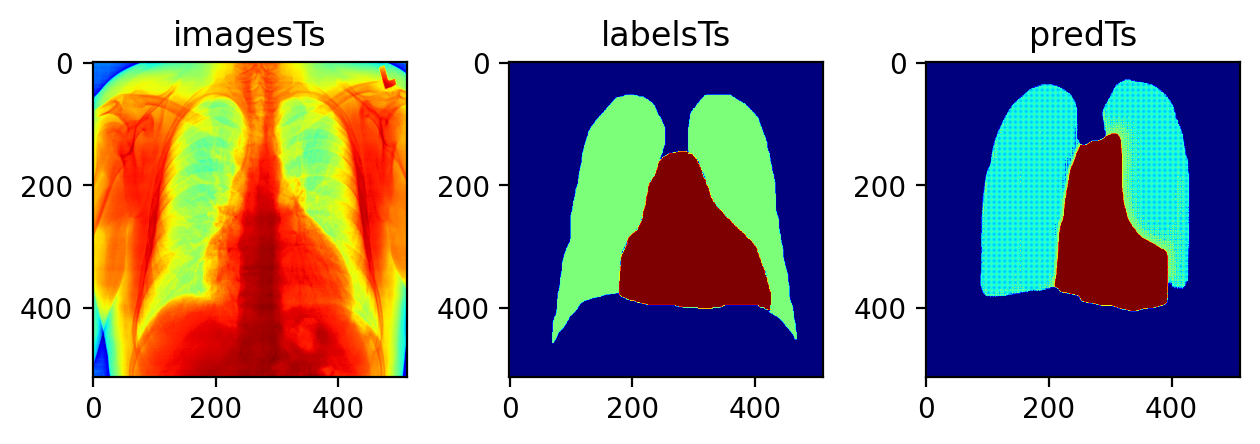

DC DICE for 43.nii.gz file is => 0.7990902112937154


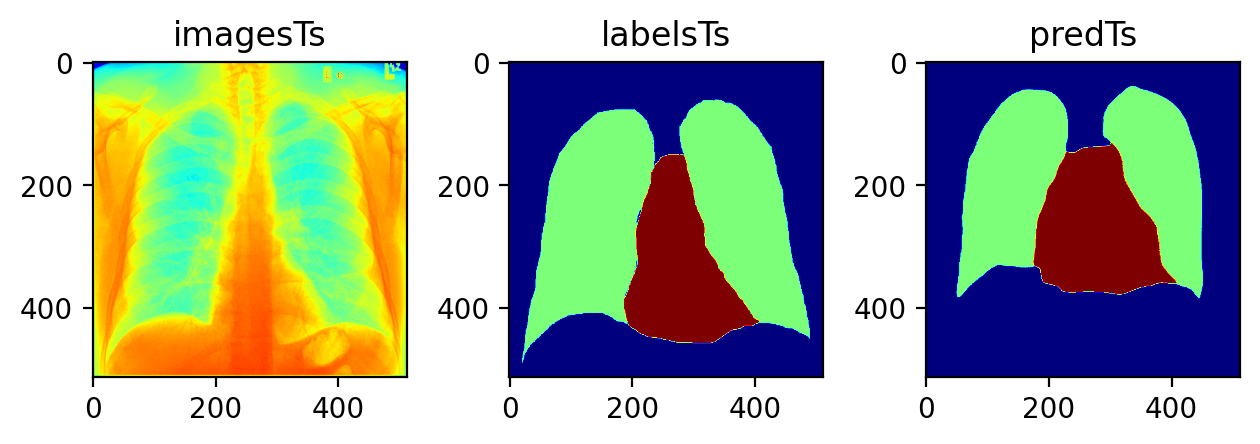

DC DICE for 47.nii.gz file is => 0.8997871087901903


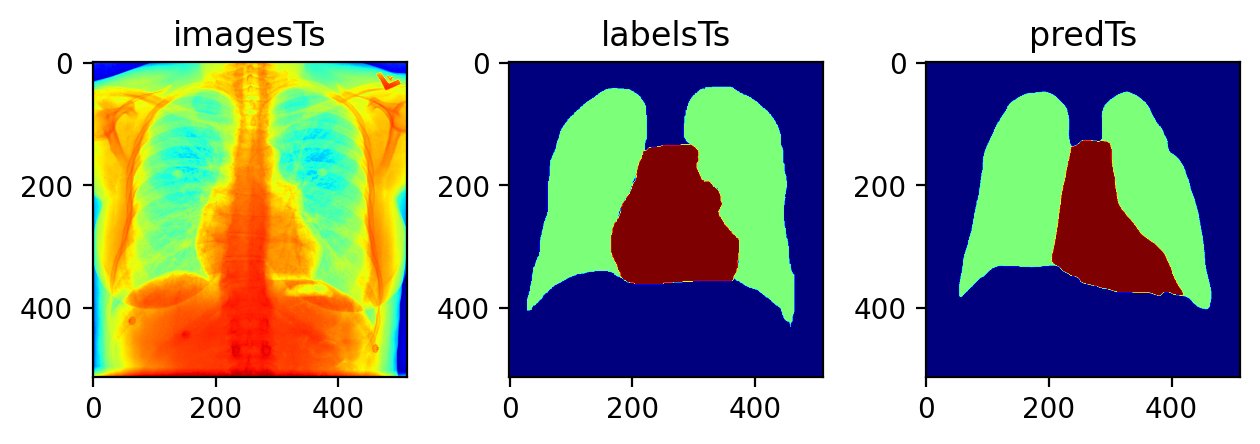

DC DICE for 18.nii.gz file is => 0.8296491038490574


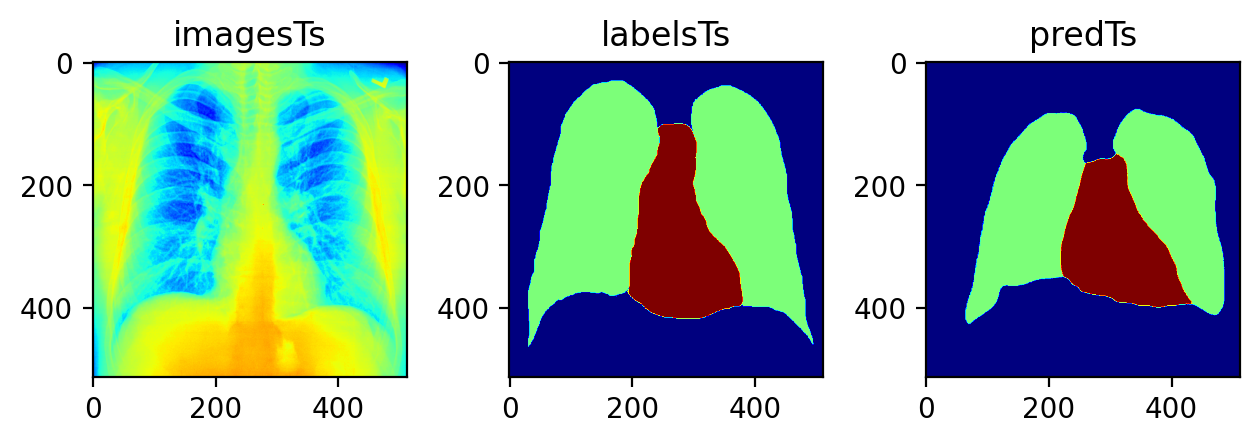

DC DICE for 21.nii.gz file is => 0.783020240319406


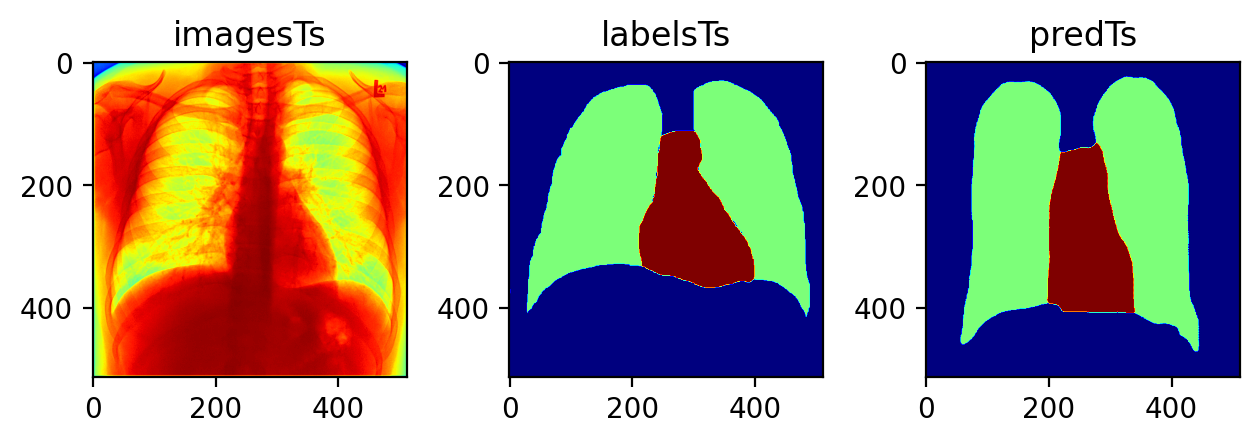

DC DICE for 4.nii.gz file is => 0.8541346043697239


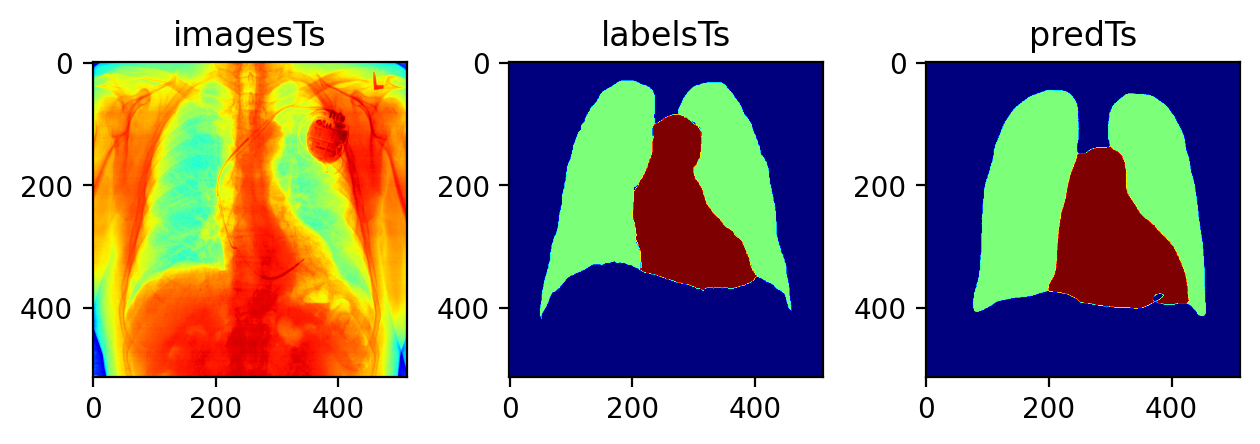

DC DICE for 42.nii.gz file is => 0.834926141425607


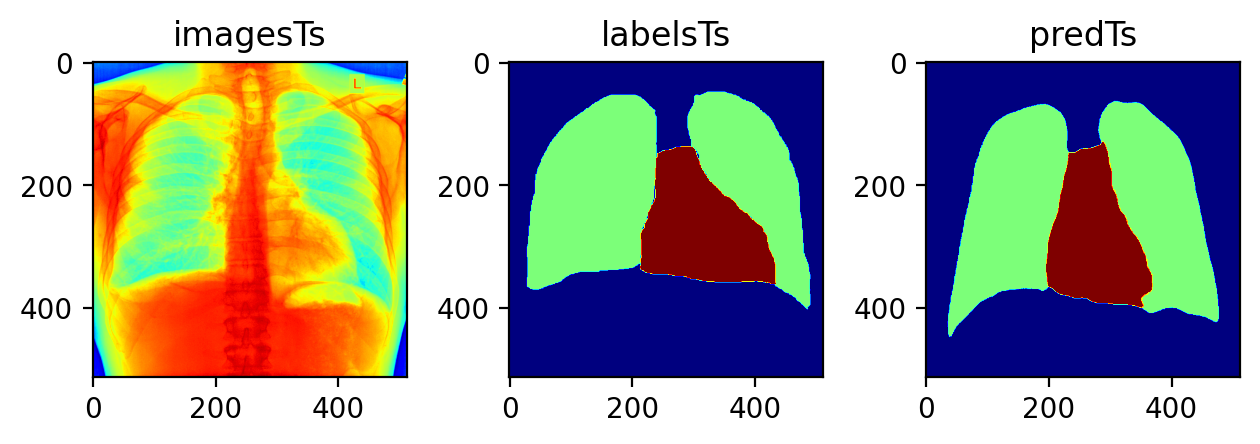

DC DICE for 3.nii.gz file is => 0.808583964785248


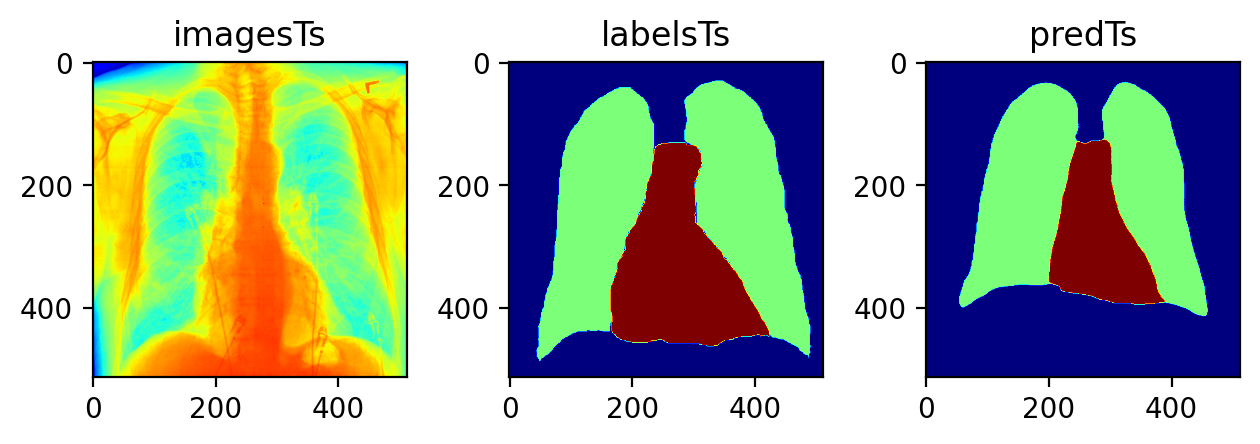

DC DICE for 31.nii.gz file is => 0.8279028680158714


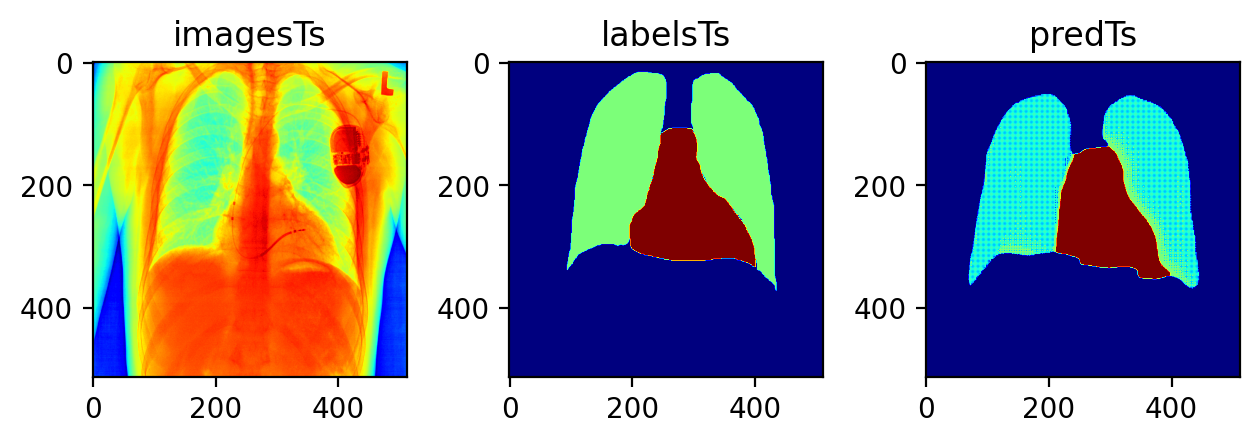

DC DICE for 15.nii.gz file is => 0.889973503590345


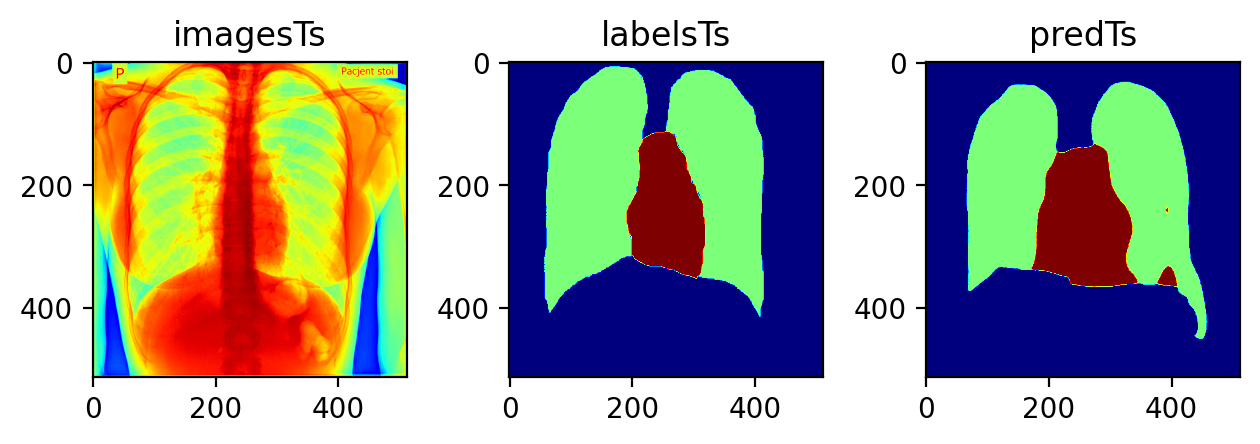

DC DICE for 23.nii.gz file is => 0.8598631980203931


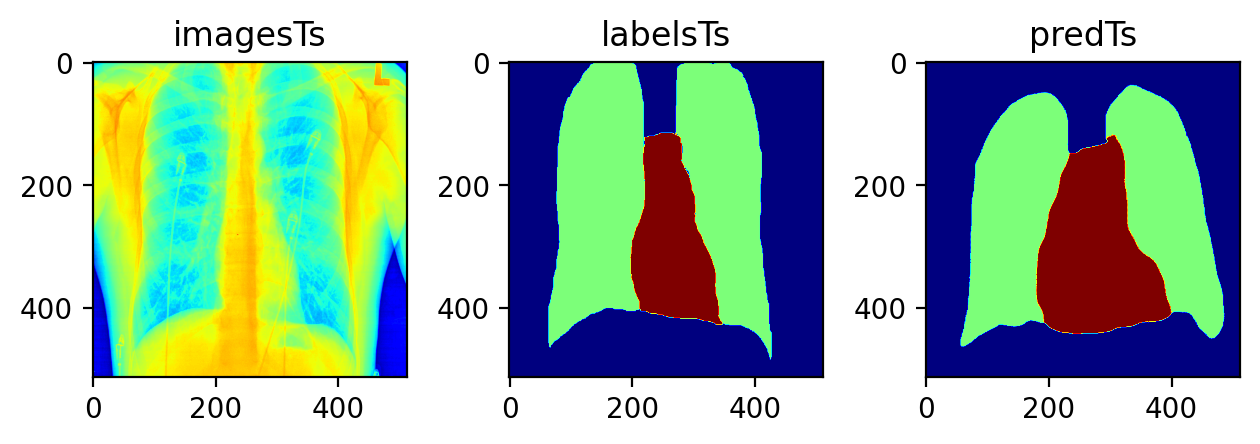

DC DICE for 1.nii.gz file is => 0.8269649508372655


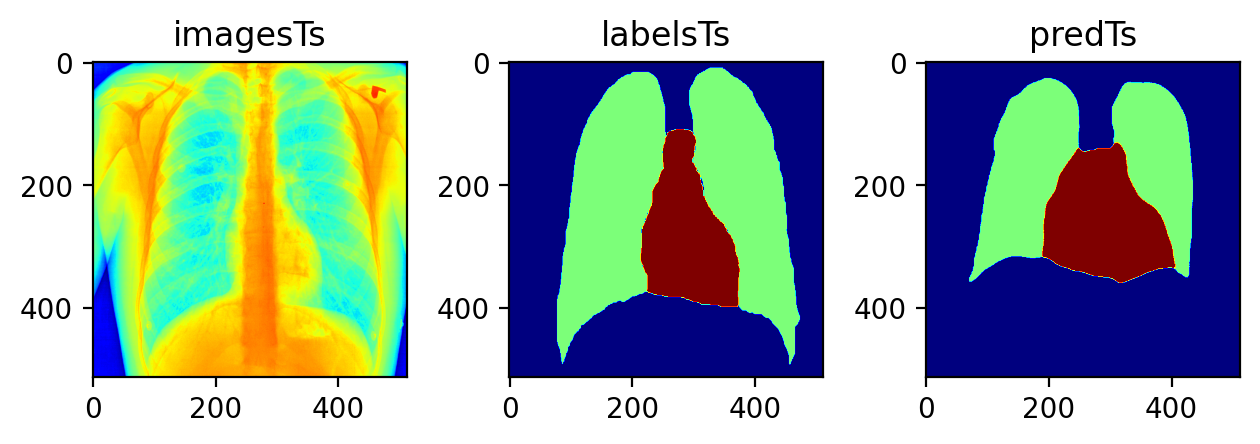

DC DICE for 36.nii.gz file is => 0.7937629077673756


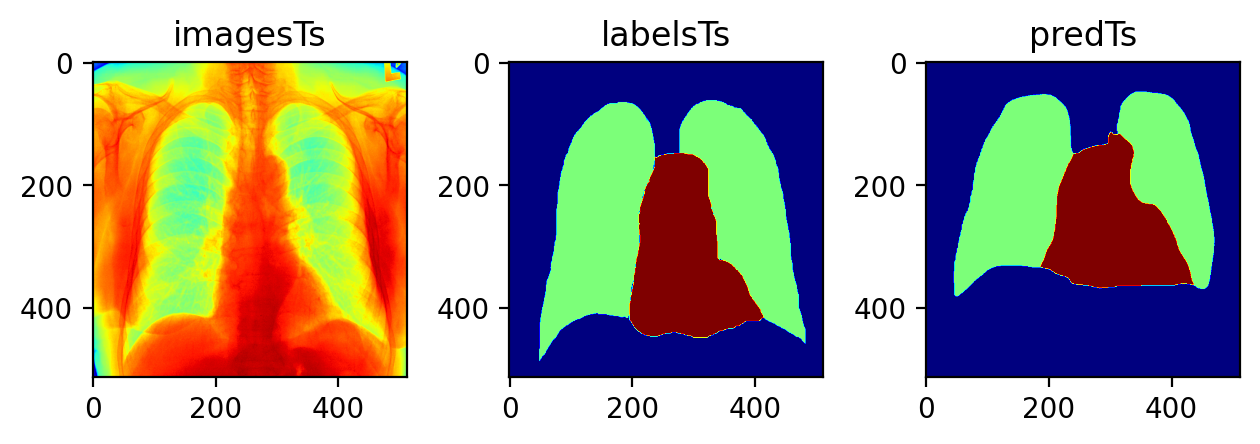

DC DICE for 13.nii.gz file is => 0.8591011823660243


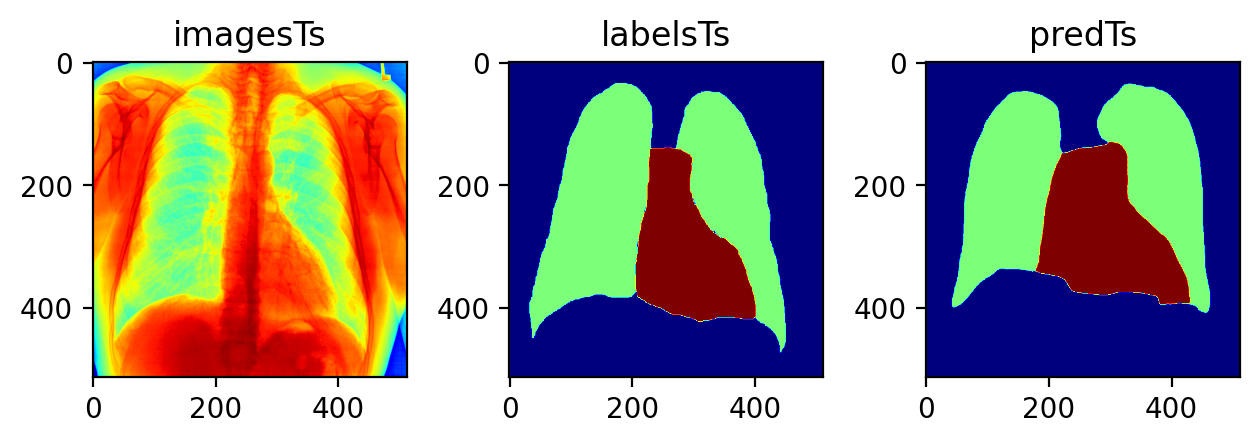

DC DICE for 14.nii.gz file is => 0.8388712368221665


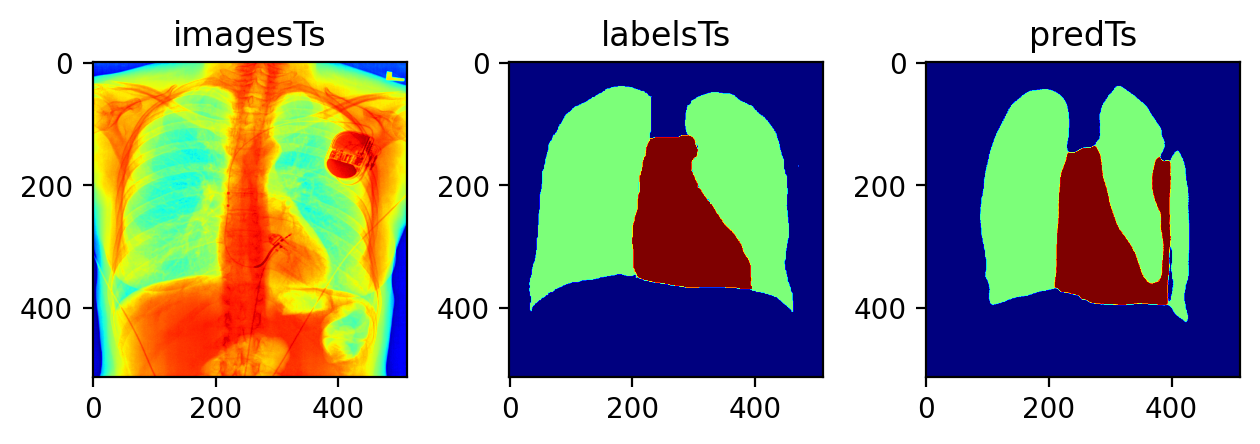

DC DICE for 5.nii.gz file is => 0.7786249817014379


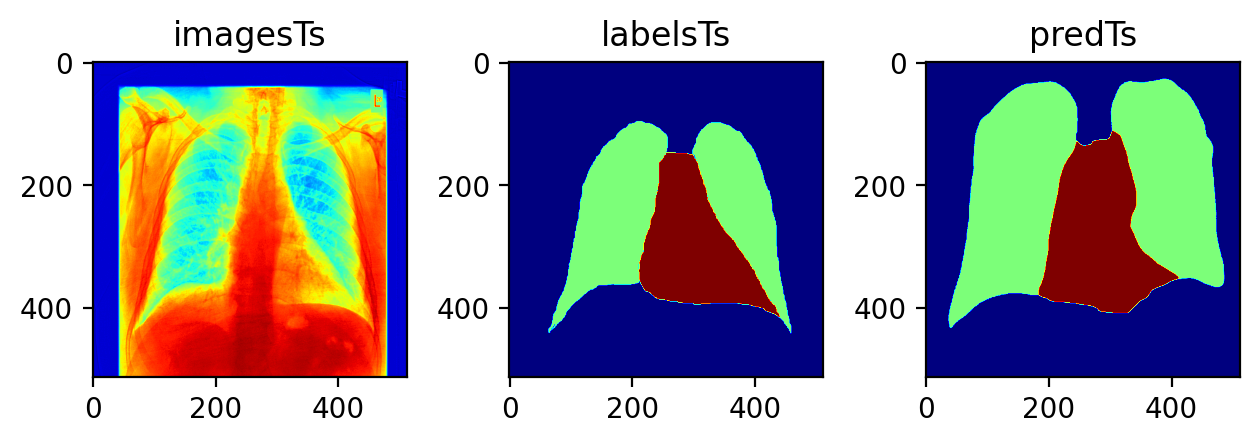

DC DICE for 22.nii.gz file is => 0.9248374835740027


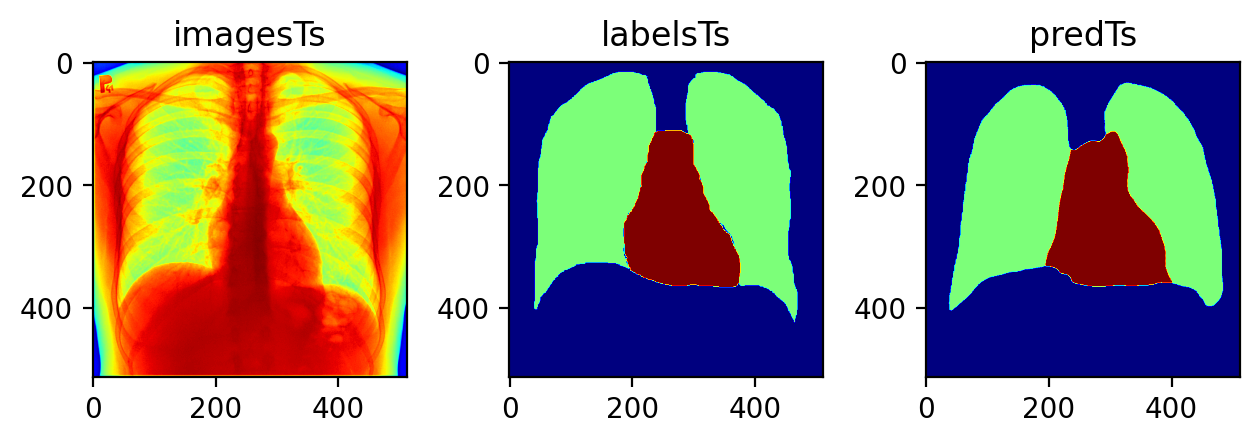

DC DICE for 45.nii.gz file is => 0.8235644446672088


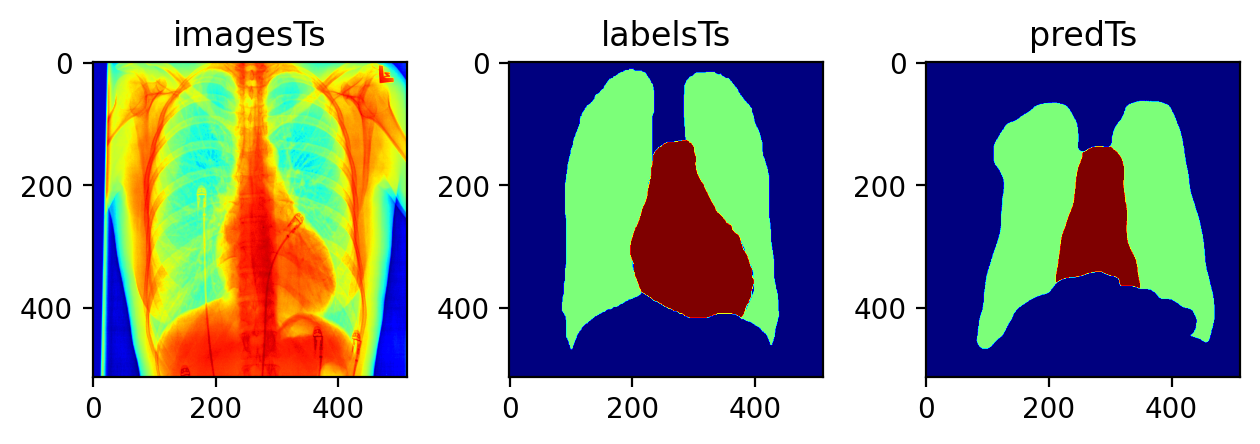

DC DICE for 41.nii.gz file is => 0.8857523431796629


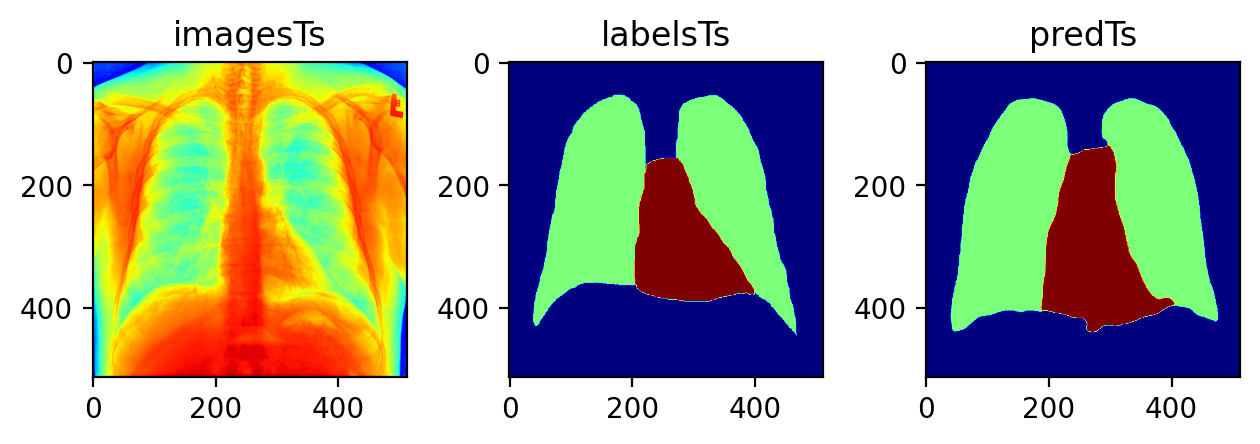

DC DICE for 29.nii.gz file is => 0.8487164880487745


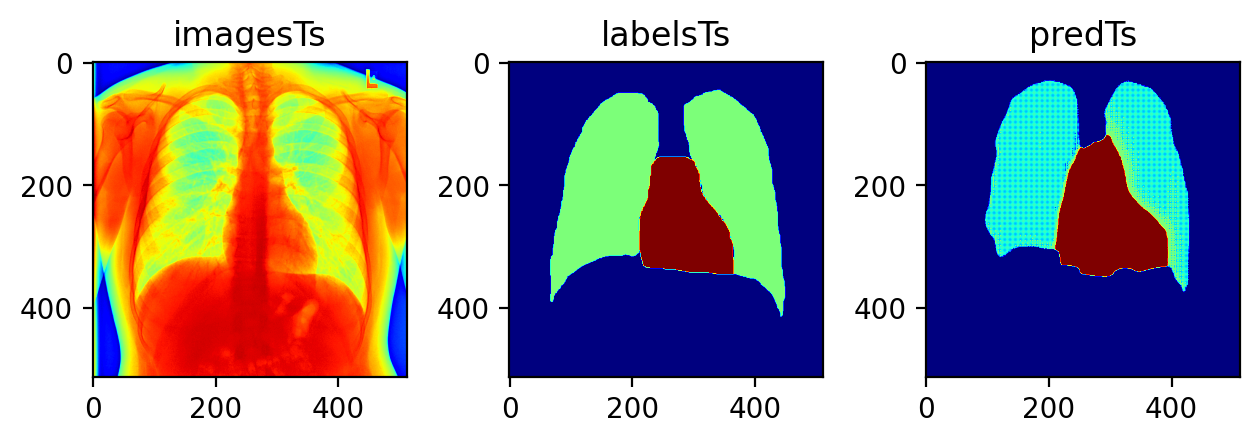

DC DICE for 49.nii.gz file is => 0.9049312649130211


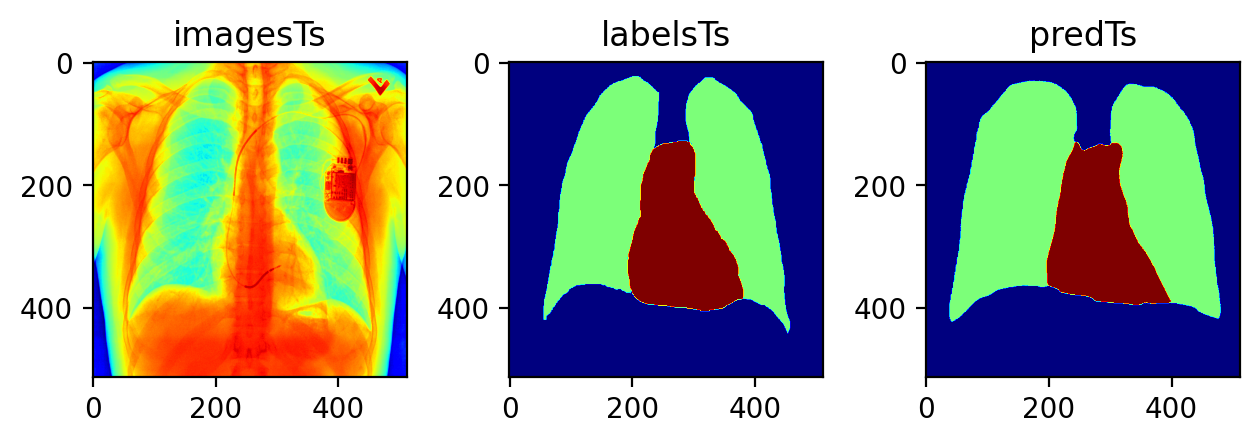

DC DICE for 12.nii.gz file is => 0.8765849991750266


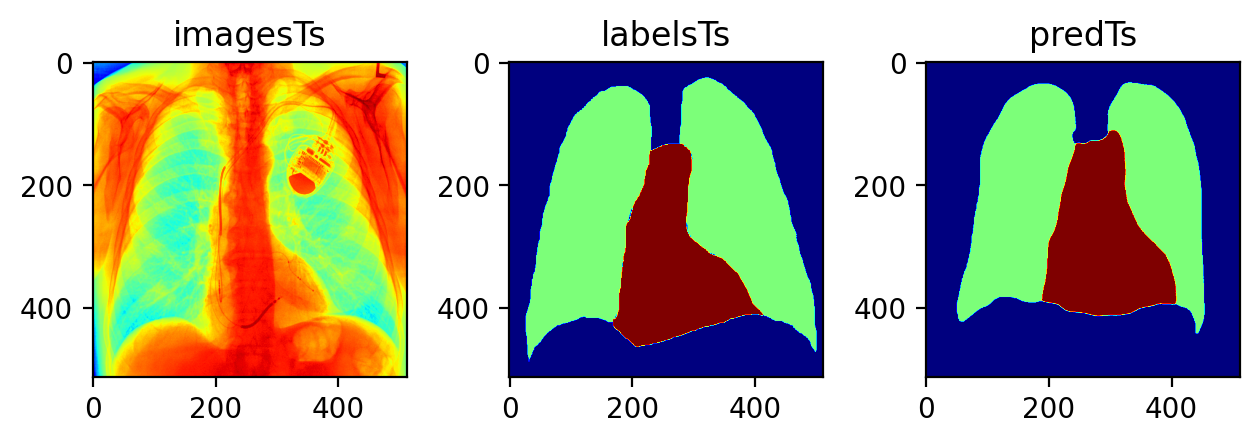

DC DICE for 48.nii.gz file is => 0.7171028445512877


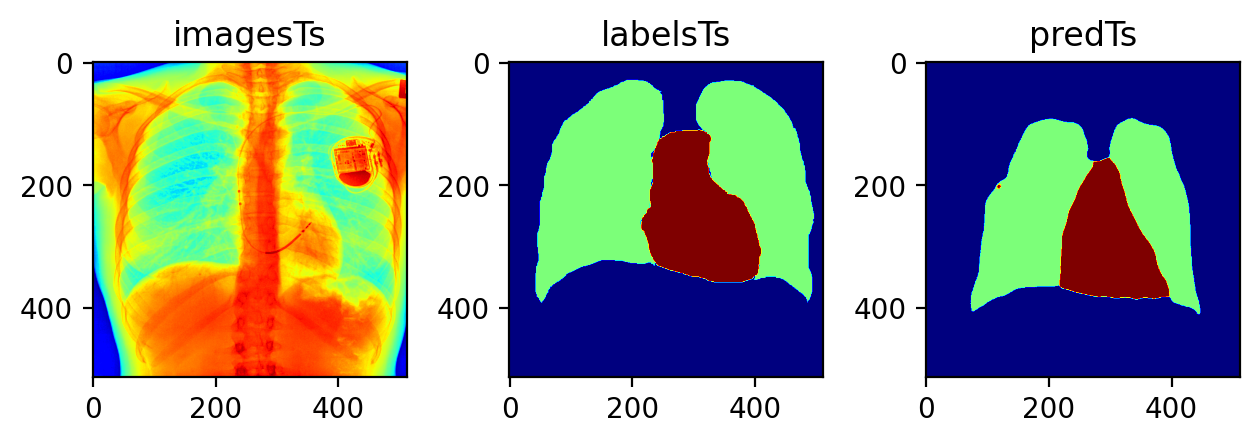

DC DICE for 11.nii.gz file is => 0.908079245873187


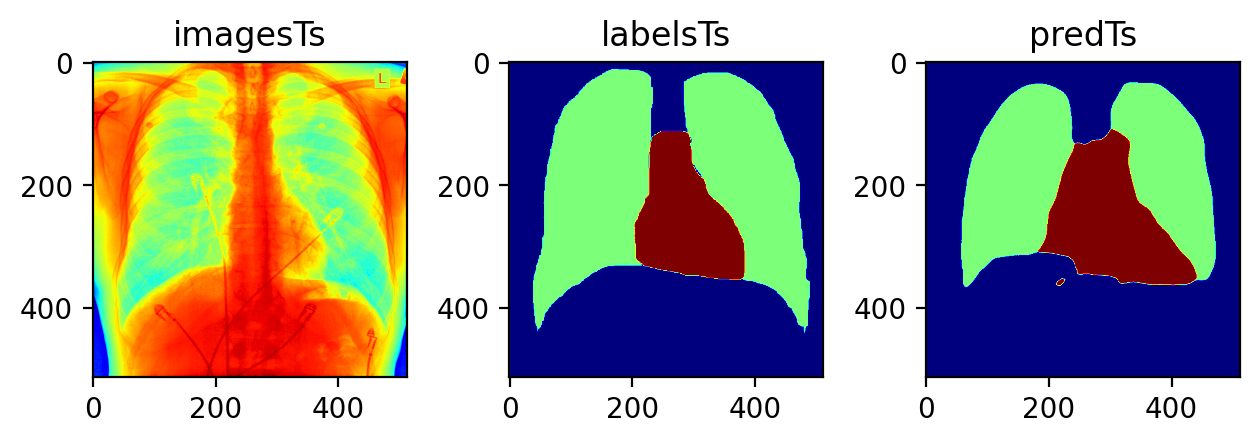

DC DICE for 32.nii.gz file is => 0.8435230265089257


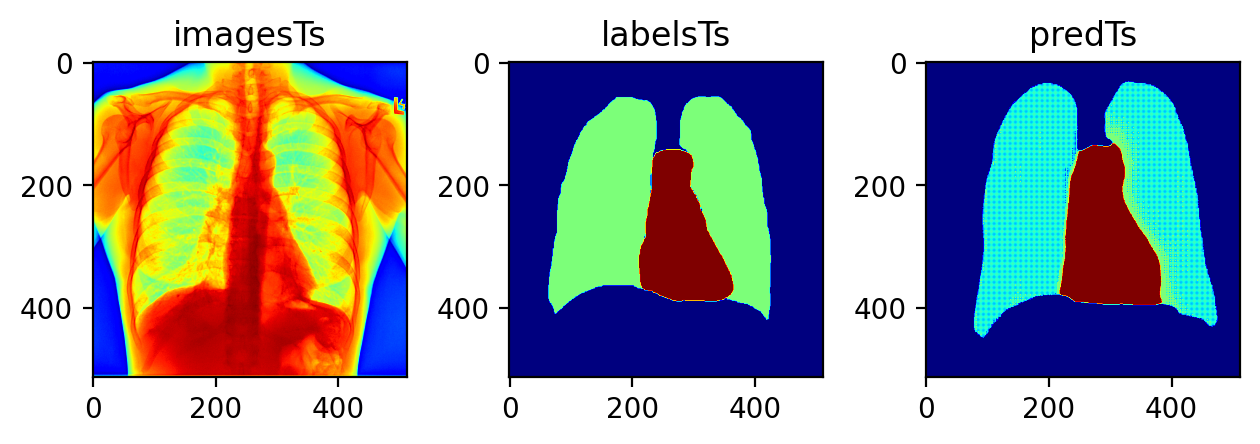

DC DICE for 26.nii.gz file is => 0.7636998030778428


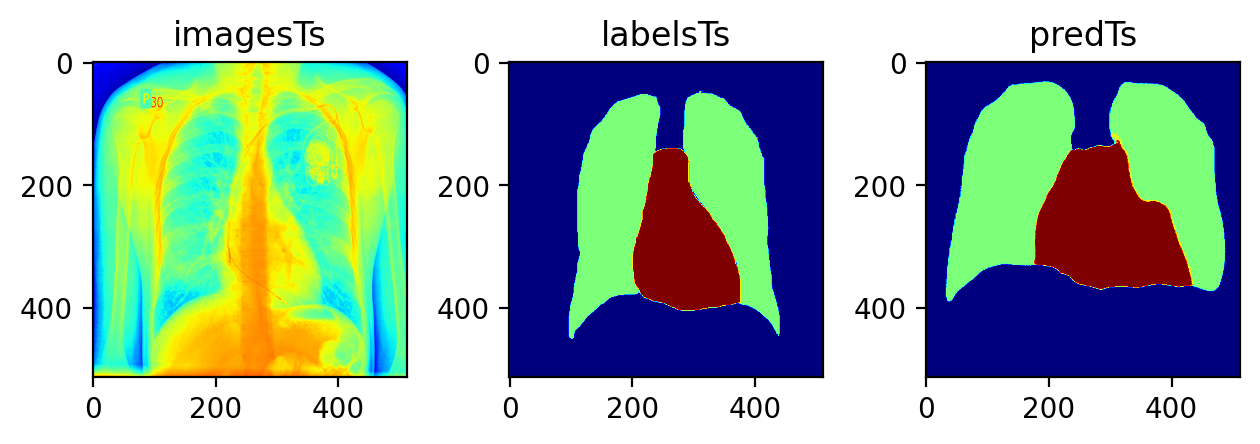

DC DICE for 2.nii.gz file is => 0.8699161161037137


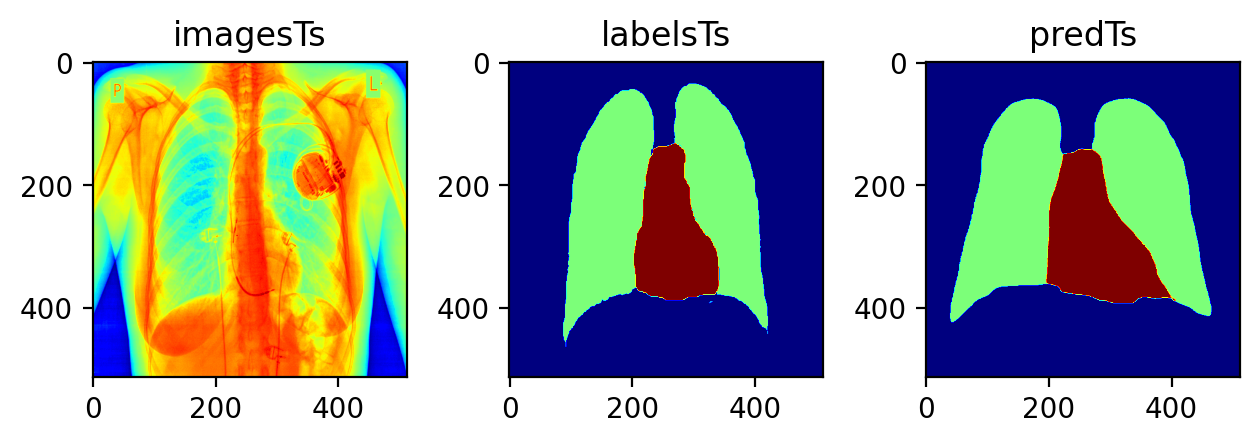

DC DICE for 37.nii.gz file is => 0.7266363219539986


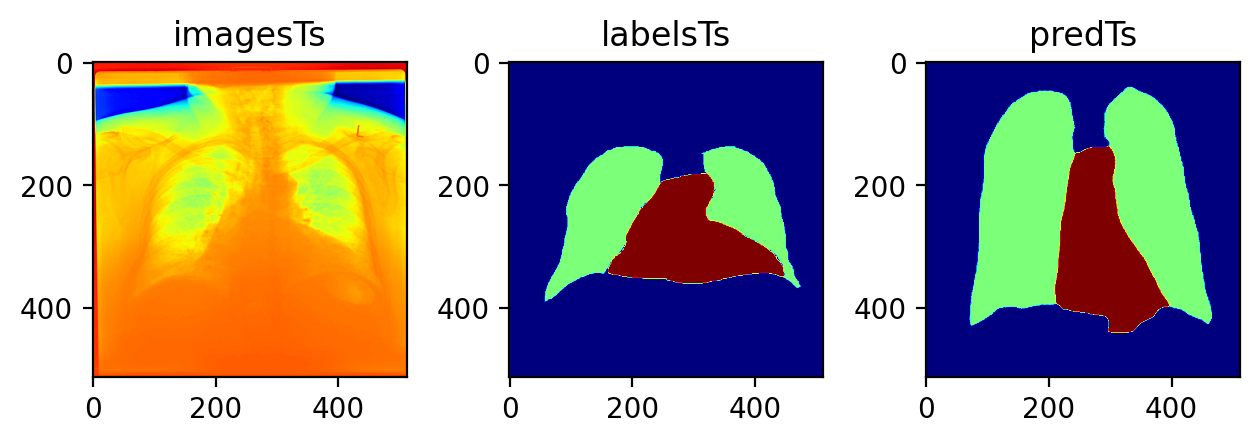

DC DICE for 20.nii.gz file is => 0.81096133351958


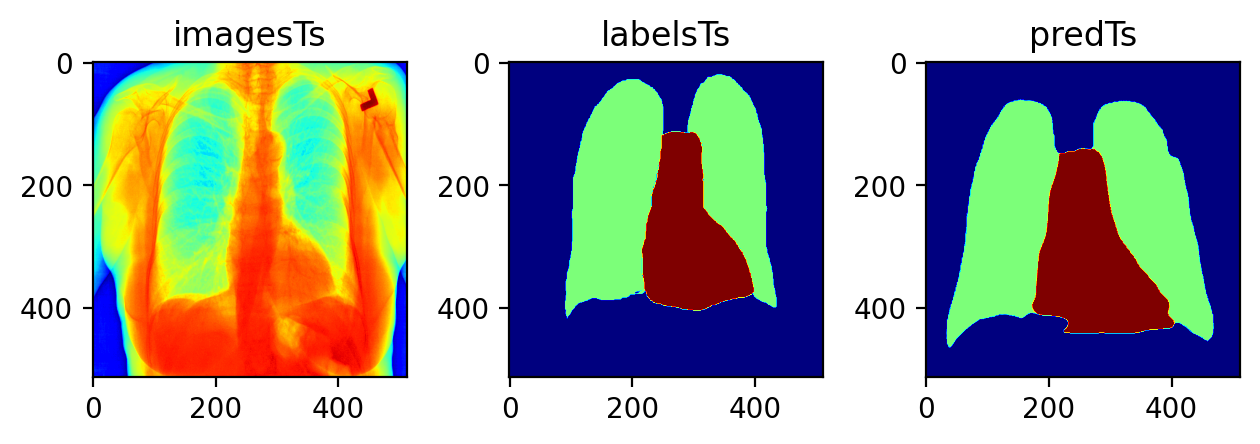

In [ ]:
TRUE_IMG_PATH   = "/BAYESIAN_UNET/VanillaUNet/data/heart"  

check_orientation(TRUE_IMG_PATH,["imagesTs","labelsTs","predTs"])

In [ ]:
SHOW_LIST=[]
SHOW_TITLE=[]

In [ ]:
plt.figure(dpi=200)
for index, (item, title) in enumerate(zip(SHOW_LIST,SHOW_TITLE)):
    plt.subplot(SIZE[0], SIZE[1],SIZE[2], index+1)
    plt.imshow(item, cmap=CMAP)
    plt.title(title)
plt.tight_layout()
plt.show()